Data Exploration

In [1]:
import pandas as pd
import numpy as np
from re import sub

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from matplotlib.ticker import FuncFormatter

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [5]:
df.isna().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [6]:
df[df['Rating'].isna()]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
85,A Man Called Otto,NaN,2022,January,PG-13,126,Marc Forster,"Tom Hanks, Rachel Keller, Manuel Garcia Rulfo,...","Comedy, Drama",USA,Unknown,Unknown,"Sweden, United States"


In [7]:
df['Certificate'].value_counts(), df['Certificate'].isna().sum()


(R            867
 PG-13        714
 PG           225
 Not Rated     61
 TV-MA         40
 G             22
 TV-14         12
 TV-PG          9
 NC-17          6
 Unrated        6
 TV-G           3
 TV-Y7          1
 Name: Certificate, dtype: int64,
 34)

In [8]:
df['Month'].value_counts()


November     260
December     249
October      187
June         166
July         152
September    151
March        150
August       149
January      148
May          144
April        121
February     121
2014           1
2008           1
Name: Month, dtype: int64

In [9]:
(df['Directors'].values == 'Unknown').sum(), (df['Stars'].values == 'Unknown').sum(), (df['Genre'].values == 'Unknown').sum()

(0, 0, 0)

In [10]:
(df['Filming_location'].values == 'Unknown').sum(), (df['Country_of_origin'].values == 'Unknown').sum(), 


(76, 0)

In [11]:
(df['Income'].values == 'Unknown').sum(), (df['Budget'].values == 'Unknown').sum(), (df['Runtime'].values == 'Unknown').sum()


(145, 304, 2)

Data Cleaning

In [13]:
df.loc[df['Month'] == '2008', 'Month'] = 'June'
df.loc[df['Month'] == '2014', 'Month'] = 'July'

In [14]:
for i in df.loc[(df['Certificate'] == 'Unrated') | (df['Certificate'] == 'Not Rated') | (pd.isna(df['Certificate'])), 'Genre'].index :
  genre = df.iloc[i].Genre.split(',')[0]
  most_freq = df.Certificate[df['Genre'].str.contains(genre)].mode().item()
  df.loc[i, 'Certificate'] = most_freq

In [16]:
df.dropna(axis=0, inplace=True)

In [17]:
df.drop(df[(df['Year'] == 2022) & (df['Month'] == 'December')].index, inplace=True)

In [18]:
df = df[(df['Income'] != 'Unknown') & (df['Budget'] != 'Unknown')]

In [19]:
df['Runtime'] = df['Runtime'].astype(int)

In [20]:
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10 
}

In [21]:
for idx, value in enumerate(df['Budget']):
  if str(df.iloc[idx].Budget)[0] in conversion_dict.keys():
    df.loc[df['Budget'] == value, 'Budget'] = int(sub("[^0-9]", "", value)) * conversion_dict[df.iloc[idx].Budget[0]]

In [22]:
for idx, value in enumerate(df['Income']):
  if str(df.iloc[idx].Income)[0] == '$':
    df.loc[df['Income'] == value, 'Income'] = int(sub("[^0-9]", "", value))

Explore the movies/ratings by year and genre

In [30]:
sunburst = df[['Year', 'Genre', 'Title', 'Rating']].sort_values('Rating', ascending=False)
sunburst['Genre'] = sunburst['Genre'].apply(lambda x: x.split(', ')[0])

burst = px.sunburst(sunburst, 
                    path=['Year', 'Genre', 'Title'], 
                    values='Rating',
                    width=650, 
                    height=650
                    )

burst.show()

Rating Histogram

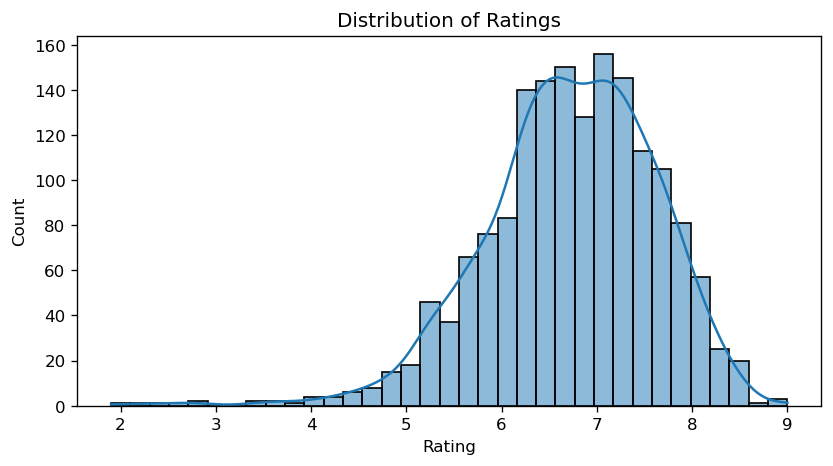

In [24]:
plt.figure(figsize=(8, 4), dpi=120)
sns.histplot(data=df,
             x=df.Rating,
             bins=35,
             kde=True)
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()


Get most frequent items in columns

In [32]:
def most_freq(col, elements):
  
  new_df = df[[col]].copy()
  new_df[col] = [x.split(', ') for x in new_df[col]]
  most_freq_elements = new_df[col].explode().value_counts().index[:10].tolist()

  return most_freq_elements

top_stars = most_freq('Stars', 10)
top_directors = most_freq('Directors', 10)
top_genre = most_freq('Genre', 10)
top_country_of_origin = most_freq('Country_of_origin', 10)

In [33]:
df['Profit'] = (df['Income'] - df['Budget']).apply(lambda x: round(x, -6))


Top movies by profit



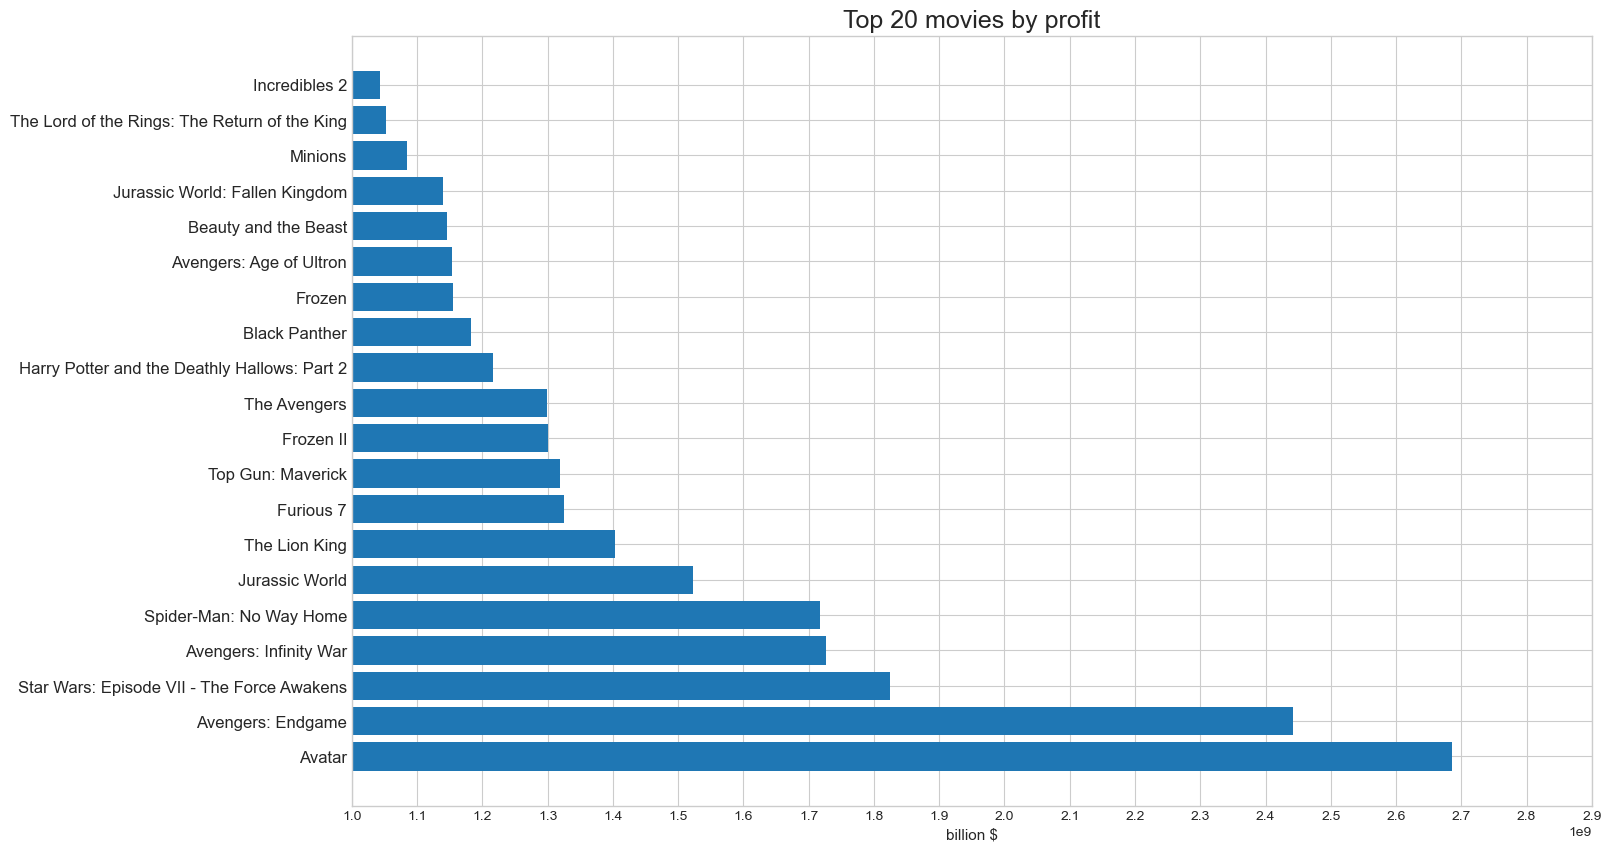

In [34]:
top_movies = df[['Title', 'Profit']].sort_values('Profit', ascending=False)[:20]

plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(16, 10))

plt.barh(top_movies.Title, top_movies.Profit)

plt.xlim(top_movies['Profit'].min(), top_movies['Profit'].max())
plt.xticks(ticks=np.arange(1, 3, 0.1) * 1e9)
plt.xlabel('billion $', fontsize=11)

plt.yticks(fontsize=12)

plt.title('Top 20 movies by profit', fontsize=18)

plt.show()

Most popular and profitable type of movies



In [35]:
movies_by_genre = {}
movies_by_country_of_origin = {}

for genre in top_genre:
  genre_len = len(df[df['Genre'].str.contains(genre)])
  movies_by_genre.update({genre: genre_len})


for country in top_country_of_origin:
  country_len = len(df[df['Country_of_origin'].str.contains(country)])
  movies_by_country_of_origin.update({country: country_len})

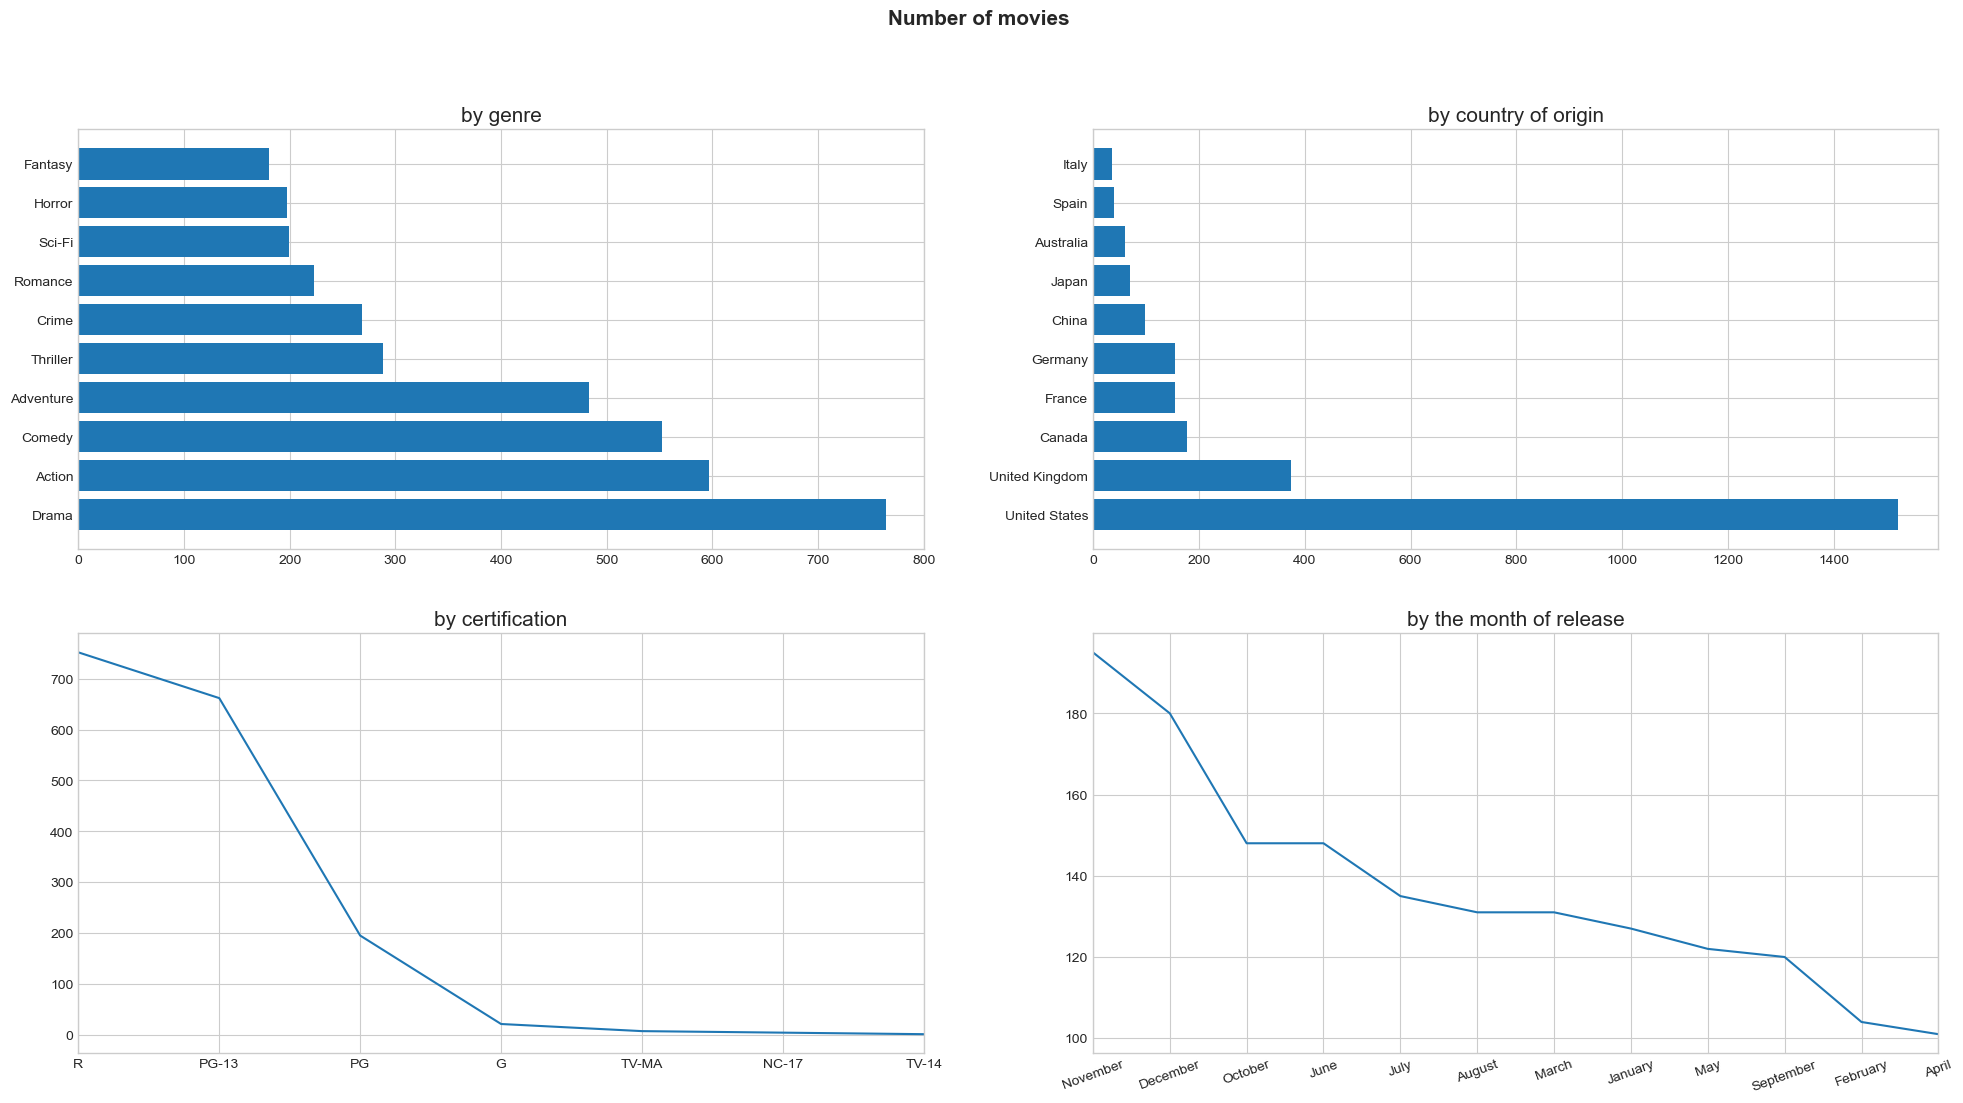

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(24,12),
                                             nrows=2,
                                             ncols=2)

fig.suptitle('Number of movies', fontweight='bold', fontsize=15)

ax1.barh(*zip(*movies_by_genre.items()))
ax1.set_title('by genre', fontsize=15)
ax1.set_xlim(right=8e2)

ax2.barh(*zip(*movies_by_country_of_origin.items()))
ax2.set_title('by country of origin', fontsize=15)

ax3.plot(df.Certificate.value_counts())
ax3.set_title('by certification', fontsize=15)
ax3.set_xlim(left=0, right=len(df.Certificate.value_counts())-1)

ax4.plot(df.Month.value_counts())
ax4.set_title('by the month of release', fontsize=15)
ax4.tick_params(axis='x', labelrotation=20)
ax4.set_xlim(left=0, right=len(df.Month.value_counts())-1);

In [38]:
profit_by_genre = {}
profit_by_country_of_origin = {}

profit_by_certificate = df.groupby(['Certificate'], as_index='Certificate')['Profit'].mean().sort_values(ascending=False)
profit_by_month = df.groupby(['Month'], as_index='Month')['Profit'].mean().sort_values(ascending=False)

for genre in top_genre:
  average_profit = df.loc[df['Genre'].str.contains(genre), 'Profit'].mean()
  profit_by_genre.update({genre: round(int(average_profit), -5)})

for country in top_country_of_origin:
  average_profit = df.loc[df['Country_of_origin'].str.contains(country), 'Profit'].mean()
  profit_by_country_of_origin.update({country: round(int(average_profit), -5)})


profit_by_genre = dict(sorted(profit_by_genre.items(), key=lambda x: x[1], reverse=True))
profit_by_country_of_origin = dict(sorted(profit_by_country_of_origin.items(), key=lambda x: x[1], reverse=True))

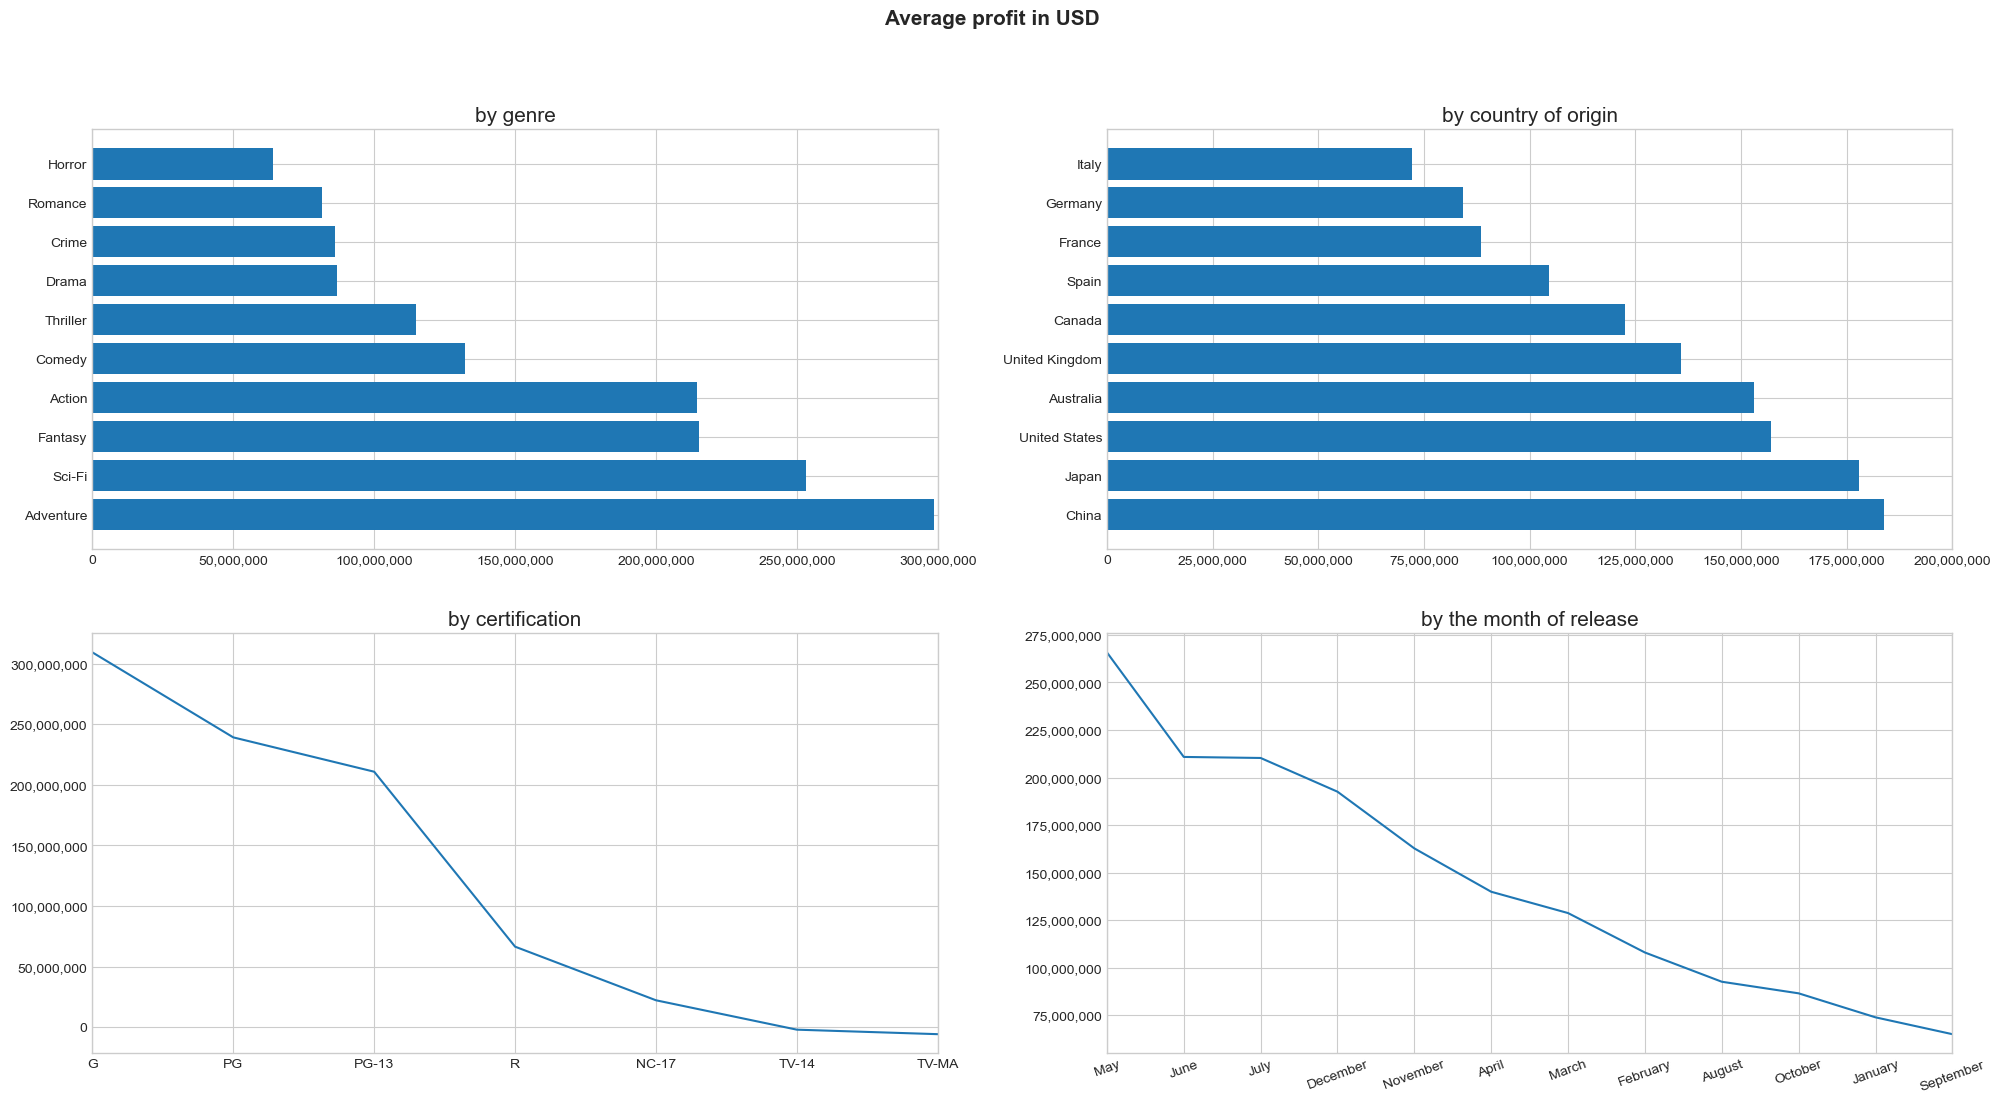

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(24,12),
                                             nrows=2,
                                             ncols=2)


fig.suptitle('Average profit in USD', fontweight='bold', fontsize=15)

ax1.barh(*zip(*profit_by_genre.items()))
ax1.set_title('by genre', fontsize=15)
ax1.set_xlim(right=3e8)
ax1.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.barh(*zip(*profit_by_country_of_origin.items()))
ax2.set_title('by country of origin', fontsize=15)
ax2.set_xlim(right=2e8)
ax2.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.plot(profit_by_certificate)
ax3.set_title('by certification', fontsize=15)
ax3.set_xlim(left=0, right=len(profit_by_certificate)-1)
ax3.get_yaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax4.plot(profit_by_month)
ax4.set_title('by the month of release', fontsize=15)
ax4.tick_params(axis='x', labelrotation=20)
ax4.set_xlim(left=0, right=len(profit_by_month)-1)
ax4.get_yaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

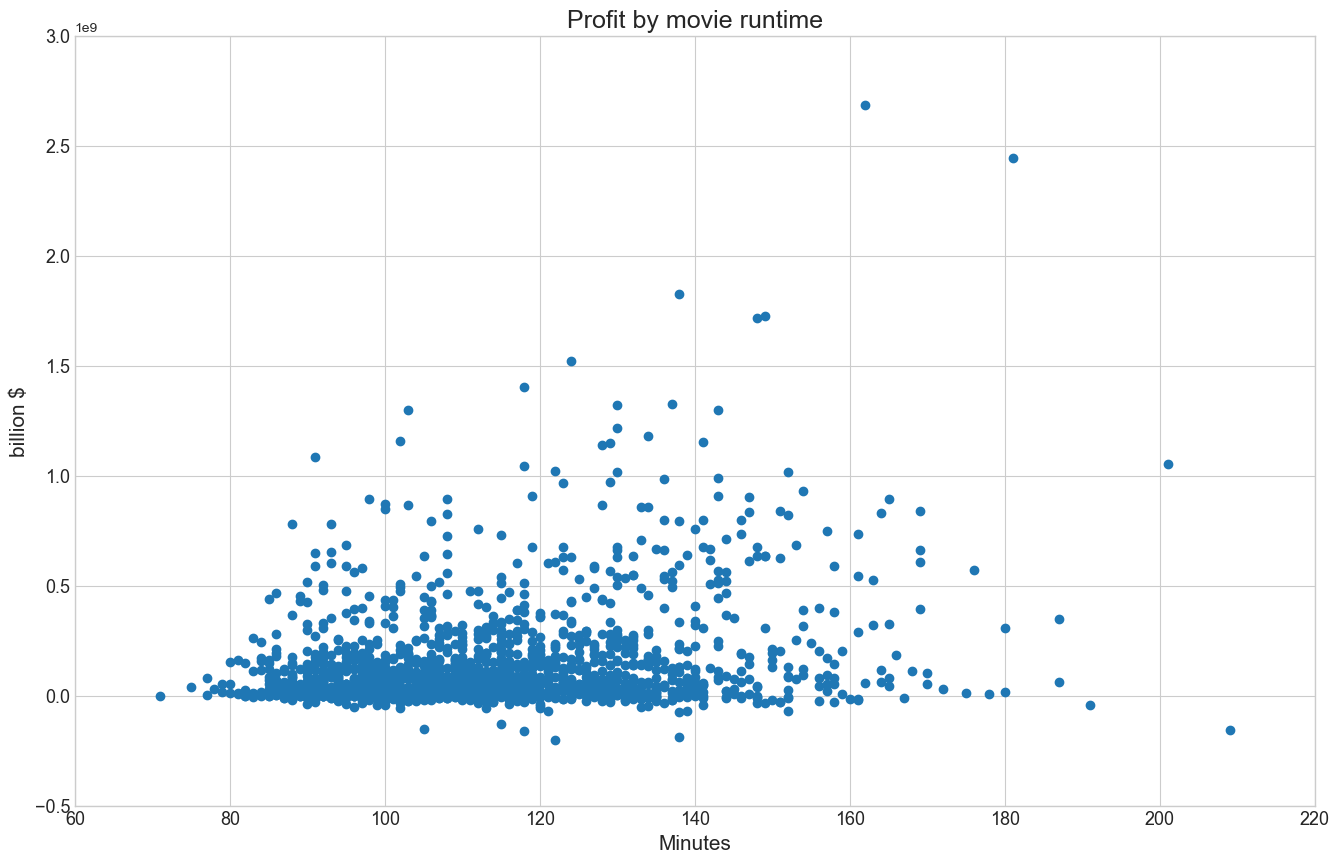

In [40]:
fig = plt.figure(figsize=(16, 10))

plt.scatter(df.Runtime, df.Profit)

plt.xlabel('Minutes', fontsize=15)
plt.xlim(60, 220)
plt.xticks(fontsize=13)

plt.ylabel('billion $', fontsize=15)
plt.ylim(-0.5e9, 3.0e9)
plt.yticks(fontsize=13)

plt.title('Profit by movie runtime', fontsize=18)
plt.show()

Most popular and profitable directors/actors



In [41]:
movies_by_stars = {}
profit_by_stars = {}
movies_by_directors = {}
profit_by_directors = {}


for star in top_stars:
  star_movies = df[df['Stars'].str.contains(star)]
  star_len = len(star_movies)
  average_profit = star_movies['Profit'].mean()
  
  movies_by_stars.update({star: star_len})
  profit_by_stars.update({star: round(int(average_profit), -5)})


for director in top_directors:
  director_movies = df[df['Directors'].str.contains(director)]
  director_len = len(director_movies)
  average_profit = director_movies['Profit'].mean()

  movies_by_directors.update({director: director_len})
  profit_by_directors.update({director: round(int(average_profit), -5)})

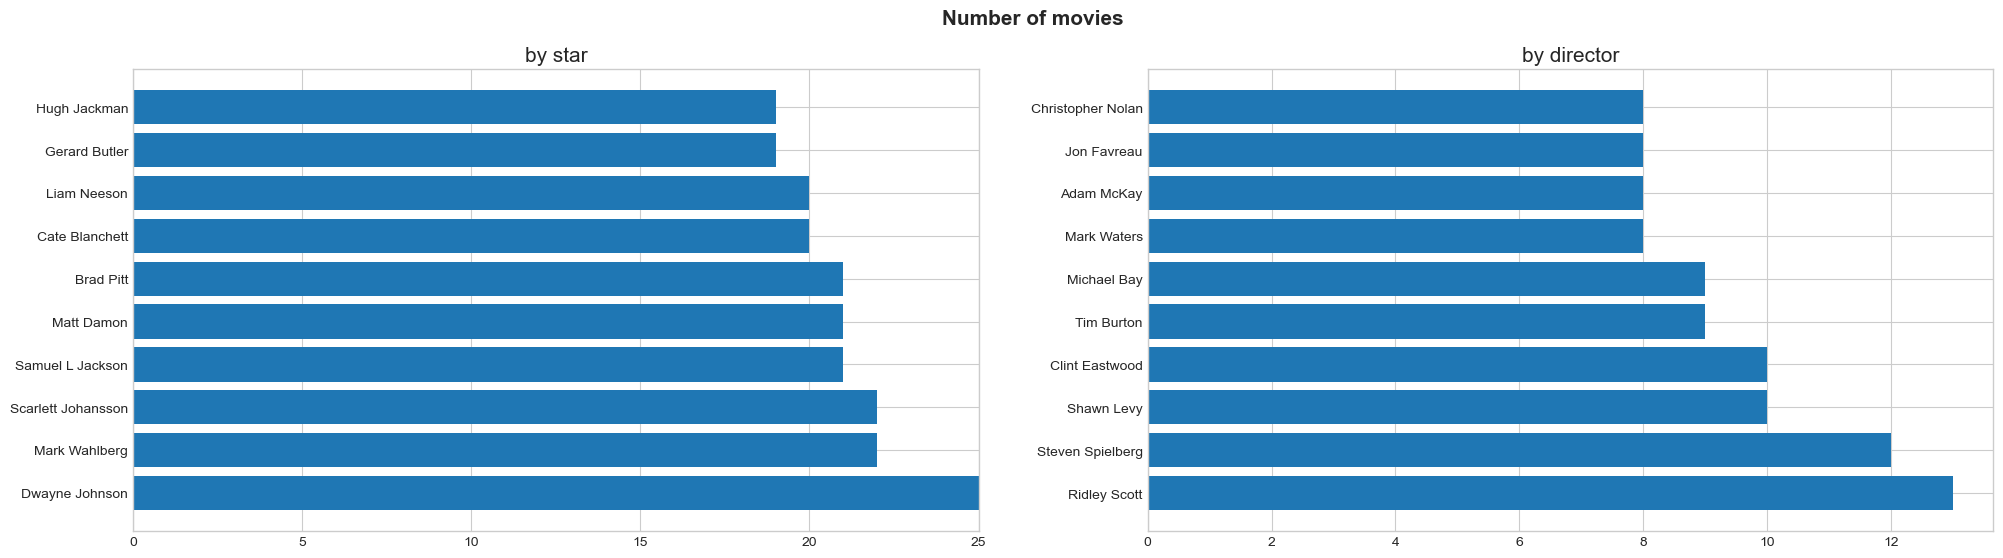

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(24,6),
                               nrows=1,
                               ncols=2)


fig.suptitle('Number of movies', fontweight='bold', fontsize=15)

ax1.barh(*zip(*movies_by_stars.items()))
ax1.set_title('by star', fontsize=15)
ax1.set_xlim(right=movies_by_stars[max(movies_by_stars, key=movies_by_stars.get)])

ax2.barh(*zip(*movies_by_directors.items()))
ax2.set_title('by director', fontsize=15);

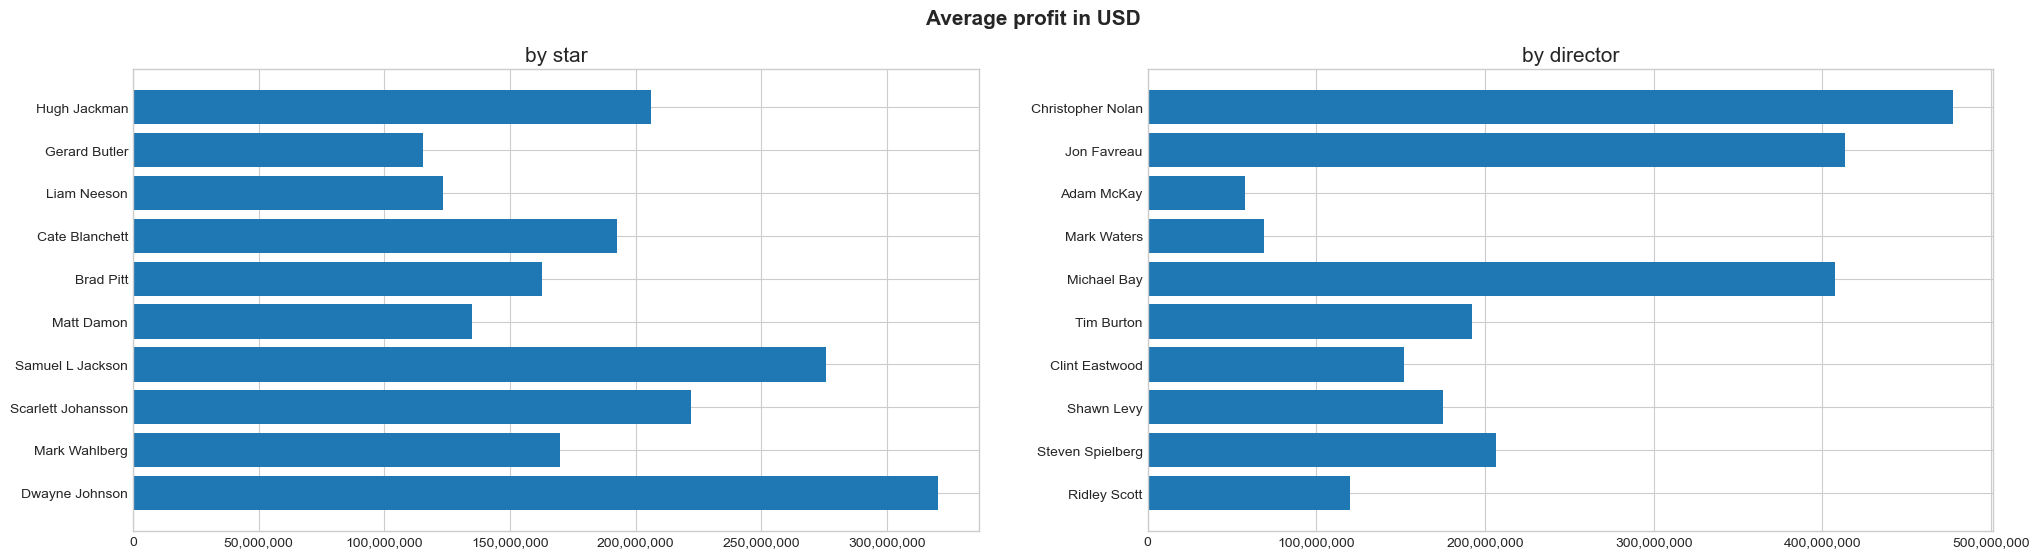

In [43]:
fig, (ax1, ax2) = plt.subplots(figsize=(24,6),
                               nrows=1,
                               ncols=2)


fig.suptitle('Average profit in USD', fontweight='bold', fontsize=15)

ax1.barh(*zip(*profit_by_stars.items()))
ax1.set_title('by star', fontsize=15)
ax1.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.barh(*zip(*profit_by_directors.items()))
ax2.set_title('by director', fontsize=15)
ax2.get_xaxis().set_major_formatter(
     FuncFormatter(lambda x, p: format(int(x), ',')))

In [44]:
try:
  import country_converter
except:
  !pip install country_converter
  import country_converter

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 44.5/44.5 kB 2.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
df.Filming_location.value_counts()


USA           777
Canada        159
UK            141
Unknown        42
Australia      38
             ... 
Costa Rica      1
Norge           1
Space           1
Peru            1
Ecuador         1
Name: Filming_location, Length: 95, dtype: int64

In [46]:
filming_location = df['Filming_location'].value_counts().rename_axis('Country').reset_index(name='Number of movies')
filming_location.drop(filming_location[filming_location['Country'] == 'Unknown'].index, inplace=True)
filming_location['ISO'] = filming_location['Country'].apply(lambda x: country_converter.convert(names=x, to='ISO3', not_found='Unknown'))
filming_location.drop(filming_location[filming_location['ISO'] == 'Unknown'].index, inplace=True)

Official Facebook not found in regex
Arctic Ocean not found in regex
California USA not found in regex
Ontario not found in regex
Polynesia not found in regex
Northern Ireland not found in regex
Michigan USA not found in regex
Norge not found in regex
Space not found in regex


In [47]:
world_map = px.choropleth(filming_location,
                          locations='ISO',
                          color='Number of movies', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

Title Wordcloud

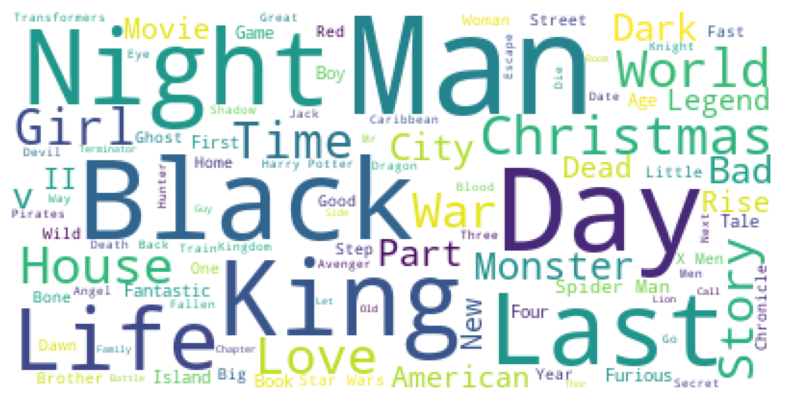

In [50]:

## install wordcloud | pip install wordcloud in command prompter

from wordcloud import WordCloud
from wordcloud import STOPWORDS

text = ' '.join(i for i in df.Title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100,).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off");

In [ ]:
Conclusion


What makes a movie popular?:

Top genres: Drama, Action, Comedy, Adventure
Most popular months for Movie releases October, November and December. -- perhaps there are a lot of holiday movies: halloween, thanksgiving, christmas and other related themes 
R and PG-13 certificates are the most popular. 
Actors with more number of movies will make larger amounts of profit. --  a combination popularity and experience
Location: Most profitable movies according to imdb are based in the United States (1) and Canada (2).
    
We can see that most profitable movies belong to the following genres: Sci-Fi, Action, Fantasy, Adventure
The months of May, June and July give the most profitable movies -- Summer movies are the most anticipated releases
G, PG and PG-13 certificates are the most widespread